# Importing of Libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 
import plotly
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True)
import plotly.graph_objs as go
%matplotlib inline
sns.set()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Data Processing And Cleaning

In [2]:
#Loading the dataset
df=pd.read_csv('transaction_data.csv')

In [3]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [4]:
#Calculating total null values of each column
df.isnull().sum()

UserId                       0
TransactionId                0
TransactionTime              0
ItemCode                     0
ItemDescription           2908
NumberOfItemsPurchased       0
CostPerItem                  0
Country                      0
dtype: int64

In [5]:
#Filling NA values
df['ItemDescription'].fillna('Not Mentioned',inplace=True)

In [6]:
df.isnull().sum()

UserId                    0
TransactionId             0
TransactionTime           0
ItemCode                  0
ItemDescription           0
NumberOfItemsPurchased    0
CostPerItem               0
Country                   0
dtype: int64

In [7]:
#Extracting useful columns from transaction time
df['Day']=df['TransactionTime'].apply(lambda x:x[:3])
df['Month']=df['TransactionTime'].apply(lambda x:x[4:7])
df['Year']=df['TransactionTime'].apply(lambda x:x[-4:])
df['Date']=df['TransactionTime'].apply(lambda x:x[8:10])

In [8]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Day,Month,Year,Date
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,Sat,Feb,2019,02
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,Wed,Dec,2018,26
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,Fri,Feb,2019,15
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,Fri,Jun,2018,22
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom,Mon,Sep,2018,10


In [9]:
#Data types of data columns
df.dtypes

UserId                      int64
TransactionId               int64
TransactionTime            object
ItemCode                    int64
ItemDescription            object
NumberOfItemsPurchased      int64
CostPerItem               float64
Country                    object
Day                        object
Month                      object
Year                       object
Date                       object
dtype: object

In [10]:
#Total Unique Users
len(df['UserId'].unique())

4373

In [11]:
#Total unique transaction id
len(df['TransactionId'].unique())

25900

In [12]:
#Creating a data table containing rows of each unique user and transaction by that user
df2=df.groupby('UserId').agg(lambda x: x.tolist())
df2.reset_index(inplace=True)

In [13]:
df2.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Day,Month,Year,Date
0,-1,"[6143225, 6143225, 6058140, 6288843, 6388019, ...","[Mon Sep 10 11:58:00 IST 2018, Mon Sep 10 11:5...","[1733592, 447867, 435225, 489594, 490329, 4434...","[WASHROOM METAL SIGN, SKULLS WRITING SET , LUN...","[3, 120, 60, 3, 30, 3, 3, 6, 3, 12, 3, 3, 3, 6...","[3.4, 1.15, 6.85, 34.45, 3.4, 11.45, 6.85, 4.5...","[United Kingdom, United Kingdom, United Kingdo...","[Mon, Mon, Mon, Sun, Sat, Sun, Wed, Sun, Sat, ...","[Sep, Sep, Jul, Dec, Feb, Nov, Nov, Nov, Mar, ...","[2018, 2018, 2018, 2018, 2019, 2018, 2018, 201...","[10, 10, 02, 30, 16, 11, 14, 11, 03, 27, 24, 2..."
1,259266,"[5955763, 5955763, 5955741, 5955741]","[Sun Apr 01 06:17:00 IST 2018, Sun Apr 01 06:1...","[486486, 486486, 486486, 486486]","[MEDIUM CERAMIC TOP STORAGE JAR, MEDIUM CERAMI...","[-222645, -222645, 222645, 222645]","[1.44, 1.44, 1.44, 1.44]","[United Kingdom, United Kingdom, United Kingdo...","[Sun, Sun, Sun, Sun]","[Apr, Apr, Apr, Apr]","[2018, 2018, 2018, 2018]","[01, 01, 01, 01]"
2,259287,"[6308621, 5913886, 6392980, 6182352, 6308621, ...","[Sat Jan 12 08:25:00 IST 2019, Fri Feb 18 10:5...","[489468, 477246, 494592, 486675, 476679, 44656...","[SET OF 60 VINTAGE LEAF CAKE CASES , ALARM CLO...","[72, 12, 18, 12, 54, 36, 18, 12, 36, 36, 30, 3...","[0.76, 5.18, 2.88, 4.49, 4.08, 2.7, 8.22, 5.87...","[Iceland, Iceland, Iceland, Iceland, Iceland, ...","[Sat, Fri, Mon, Sun, Sat, Sat, Fri, Mon, Tue, ...","[Jan, Feb, Feb, Oct, Jan, Jan, Feb, Apr, Aug, ...","[2019, 2028, 2019, 2018, 2019, 2019, 2028, 201...","[12, 18, 18, 14, 12, 12, 18, 09, 21, 12, 14, 2..."
3,259308,"[5932498, 5961978, 6038505, 5932498, 5932498, ...","[Tue Feb 27 15:09:00 IST 2018, Sun Apr 08 06:4...","[481992, 456246, 484638, 445431, 461622, -1, 4...","[60 CAKE CASES VINTAGE CHRISTMAS, MULTI HEARTS...","[72, 72, 288, 216, 432, 18, 432, 3, 216, 216, ...","[0.76, 1.18, 1.73, 2.01, 0.41, 55.2, 0.41, 55....","[Finland, Finland, Finland, Finland, Finland, ...","[Tue, Sun, Sun, Tue, Tue, Tue, Tue, Fri, Tue, ...","[Feb, Apr, Jun, Feb, Feb, Feb, Feb, Dec, Feb, ...","[2018, 2018, 2018, 2018, 2018, 2018, 2018, 201...","[27, 08, 17, 27, 27, 27, 27, 07, 27, 27, 27, 2..."
4,259329,"[6353699, 6353699, 6353699, 6353699, 6353699, ...","[Sat Feb 02 05:51:00 IST 2019, Sat Feb 02 05:5...","[787500, 434385, 471261, 1785294, 439194, 4739...","[TEA TIME TEAPOT IN GIFT BOX, DOORMAT RED RETR...","[36, 18, 24, 9, 18, 36, 6, 36, 18, 24, 6, 3, 3...","[6.84, 11.39, 2.9, 8.22, 4.08, 2.01, 14.84, 2....","[Italy, Italy, Italy, Italy, Italy, Italy, Ita...","[Sat, Sat, Sat, Sat, Sat, Sat, Sat, Sat, Sat, ...","[Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, ...","[2019, 2019, 2019, 2019, 2019, 2019, 2019, 201...","[02, 02, 02, 02, 02, 02, 02, 02, 02, 02, 02, 0..."


In [14]:
#Process to clean some column and converting to better form
#Calculation total values of columns
df2['Total Transactions']=df2['TransactionId'].apply(lambda x:len(x))
df2['Total Item Bought']=df2['NumberOfItemsPurchased'].apply(lambda x:sum(x))
df2['Country']=df2['Country'].apply(lambda x:x[0])

In [15]:
#Calculating total spent by each user
df2['Total Money Spent']=df2['UserId']
for i in range(len(df2)):
    x=df2['NumberOfItemsPurchased'][i]
    y=df2['CostPerItem'][i]
    sum=0
    for j in range(len(x)):
        sum+=x[j]*y[j]
    df2['Total Money Spent'][i]=sum

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [16]:
#Filtering and keeping userful columns
df3=df2.loc[:,['UserId','Country','ItemDescription','Total Transactions','Total Item Bought','Total Money Spent']]
df3.head()

,UserId,Country,ItemDescription,Total Transactions,Total Item Bought,Total Money Spent
0,-1,United Kingdom,"[WASHROOM METAL SIGN, SKULLS WRITING SET , LUN...",270160,1617372,11999271
1,259266,United Kingdom,"[MEDIUM CERAMIC TOP STORAGE JAR, MEDIUM CERAMI...",4,0,0
2,259287,Iceland,"[SET OF 60 VINTAGE LEAF CAKE CASES , ALARM CLO...",364,14748,35759
3,259308,Finland,"[60 CAKE CASES VINTAGE CHRISTMAS, MULTI HEARTS...",62,14046,14963
4,259329,Italy,"[TEA TIME TEAPOT IN GIFT BOX, DOORMAT RED RETR...",146,3786,14571


In [17]:
df3.isnull().sum()

UserId                0
Country               0
ItemDescription       0
Total Transactions    0
Total Item Bought     0
Total Money Spent     0
dtype: int64

In [18]:
#We filtered the userId -1 for better analysis. If you want to keep it comment the next command
df3=df3.iloc[1:]

In [19]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Day,Month,Year,Date
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,Sat,Feb,2019,02
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,Wed,Dec,2018,26
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,Fri,Feb,2019,15
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,Fri,Jun,2018,22
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom,Mon,Sep,2018,10


Rejection: 692 points
z_score of 3 corresponds to prob of 0.27%


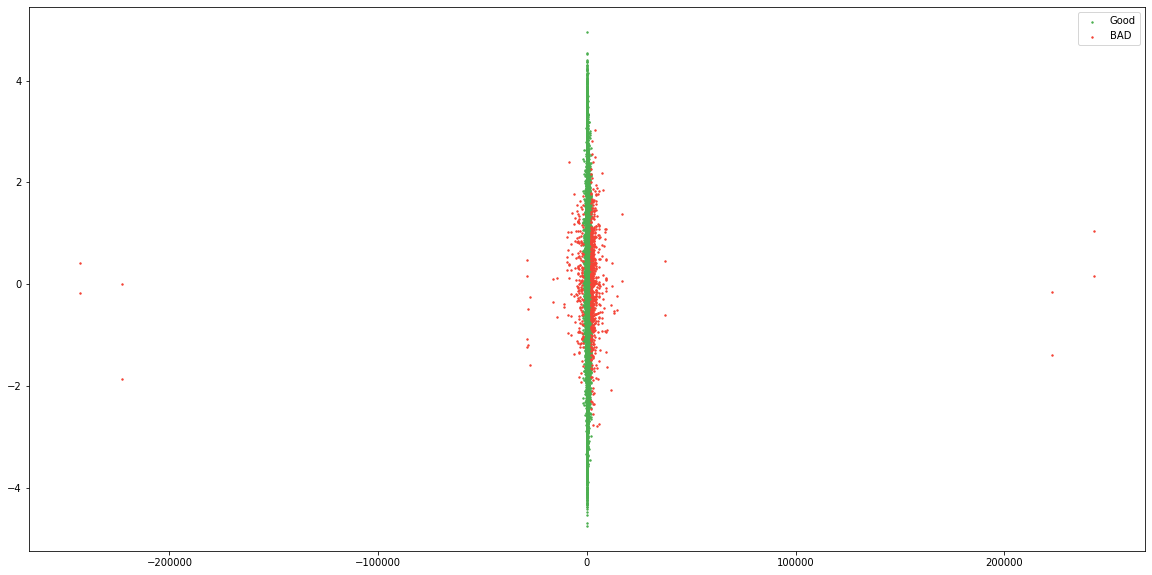

In [20]:
#Outliers Detection
mean,std=np.mean(df['NumberOfItemsPurchased']),np.std(df['NumberOfItemsPurchased'])
z_score=np.abs((df['NumberOfItemsPurchased']-mean)/std)
threshold=3
good=z_score<threshold
print(f'Rejection: {(~good).sum()} points')

from scipy.stats import norm
print(f"z_score of 3 corresponds to prob of {100*2*norm.sf(threshold):0.2f}%")
visual_scatter=np.random.normal(size=df['NumberOfItemsPurchased'].size)

plt.figure(figsize=(20,10))
plt.scatter(df['NumberOfItemsPurchased'][good],visual_scatter[good],s=2,label='Good',color='#4CAF50')
plt.scatter(df['NumberOfItemsPurchased'][~good],visual_scatter[~good],s=2,label='BAD',color='#F44336')
plt.legend()

In [21]:
df['NumberOfItemsPurchased']=abs(df['NumberOfItemsPurchased'])

Rejection: 688 points
z_score of 3 corresponds to prob of 0.27%


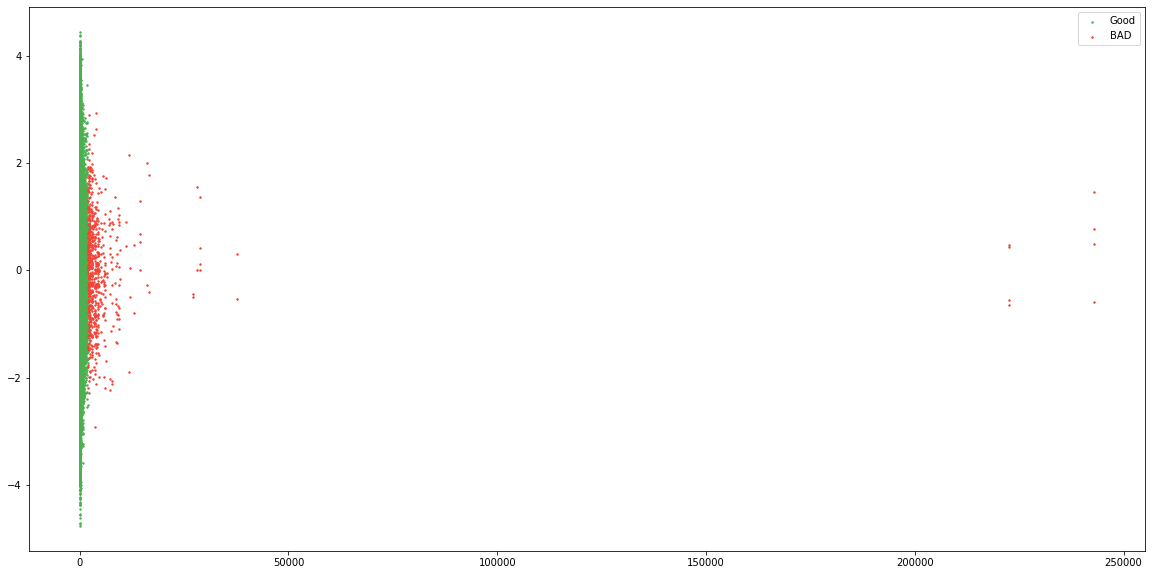

In [22]:
#Outliers Detection
mean,std=np.mean(df['NumberOfItemsPurchased']),np.std(df['NumberOfItemsPurchased'])
z_score=np.abs((df['NumberOfItemsPurchased']-mean)/std)
threshold=3
good=z_score<threshold
print(f'Rejection: {(~good).sum()} points')

from scipy.stats import norm
print(f"z_score of 3 corresponds to prob of {100*2*norm.sf(threshold):0.2f}%")
visual_scatter=np.random.normal(size=df['NumberOfItemsPurchased'].size)

plt.figure(figsize=(20,10))
plt.scatter(df['NumberOfItemsPurchased'][good],visual_scatter[good],s=2,label='Good',color='#4CAF50')
plt.scatter(df['NumberOfItemsPurchased'][~good],visual_scatter[~good],s=2,label='BAD',color='#F44336')
plt.legend()

In [23]:
df[df['NumberOfItemsPurchased']>1000]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Day,Month,Year,Date
391,366450,6241191,Sun Dec 02 06:12:00 IST 2018,459354,GIN AND TONIC MUG,2232,2.05,United Kingdom,Sun,Dec,2018,02
413,271551,6186829,Tue Oct 16 14:06:00 IST 2018,473781,WOODEN SCHOOL COLOURING SET,1080,2.01,United Kingdom,Tue,Oct,2018,16
987,269430,6133281,Sun Sep 02 06:53:00 IST 2018,476553,GROW A FLYTRAP OR SUNFLOWER IN TIN,1728,1.19,United Kingdom,Sun,Sep,2018,02
2132,270921,6205452,Sun Nov 04 06:56:00 IST 2018,461517,PACK OF 60 PINK PAISLEY CAKE CASES,1800,0.58,United Kingdom,Sun,Nov,2018,04
2841,300258,6064201,Mon Jul 09 10:26:00 IST 2018,1778532,BOX OF 24 COCKTAIL PARASOLS,1200,0.45,United Kingdom,Mon,Jul,2018,09
...,...,...,...,...,...,...,...,...,...,...,...,...
1082237,273567,6149528,Sun Sep 16 11:48:00 IST 2018,1784811,60 TEATIME FAIRY CAKE CASES,1440,0.56,United Kingdom,Sun,Sep,2018,16
1082756,366450,6199490,Mon Oct 29 16:02:00 IST 2018,489006,BLUE VINTAGE SPOT BEAKER,1230,1.50,United Kingdom,Mon,Oct,2018,29
1082853,340410,5973517,Tue Apr 17 05:42:00 IST 2018,443877,BLACK RECORD COVER FRAME,1440,4.68,United Kingdom,Tue,Apr,2018,17
1082895,366450,6242038,Sun Dec 02 08:21:00 IST 2018,444486,COOK WITH WINE METAL SIGN,1008,3.33,United Kingdom,Sun,Dec,2018,02


Rejection: 68 points
z_score of 3 corresponds to prob of 0.27%


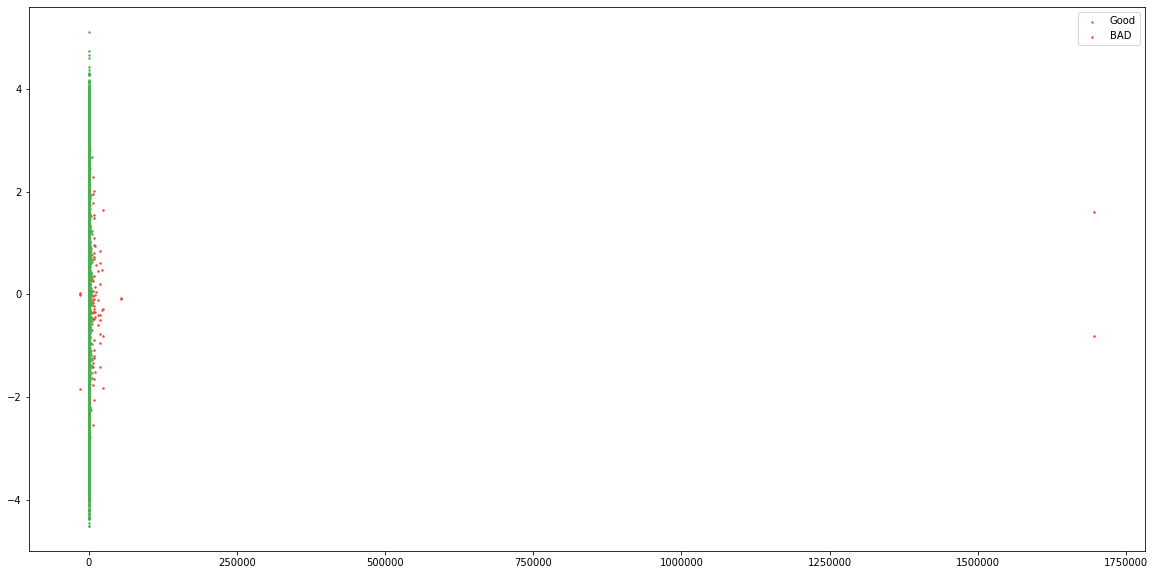

In [24]:
#Outliers Detection
mean,std=np.mean(df['CostPerItem']),np.std(df['CostPerItem'])
z_score=np.abs((df['CostPerItem']-mean)/std)
threshold=3
good=z_score<threshold
print(f'Rejection: {(~good).sum()} points')

from scipy.stats import norm
print(f"z_score of 3 corresponds to prob of {100*2*norm.sf(threshold):0.2f}%")
visual_scatter=np.random.normal(size=df['CostPerItem'].size)

plt.figure(figsize=(20,10))
plt.scatter(df['CostPerItem'][good],visual_scatter[good],s=2,label='Good',color='#4CAF50')
plt.scatter(df['CostPerItem'][~good],visual_scatter[~good],s=2,label='BAD',color='#F44336')
plt.legend()

In [25]:
df[df['CostPerItem']<0]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Day,Month,Year,Date
35768,-1,6195046,Wed Oct 24 10:51:00 IST 2018,-1,Adjust bad debt,3,-15265.64,United Kingdom,Wed,Oct,2018,24
768321,-1,6195057,Wed Oct 24 10:52:00 IST 2018,-1,Adjust bad debt,3,-15265.64,United Kingdom,Wed,Oct,2018,24
966149,-1,6195057,Wed Oct 24 10:52:00 IST 2018,-1,Adjust bad debt,3,-15265.64,United Kingdom,Wed,Oct,2018,24
988377,-1,6195046,Wed Oct 24 10:51:00 IST 2018,-1,Adjust bad debt,3,-15265.64,United Kingdom,Wed,Oct,2018,24


In [26]:
df=df[~(df['CostPerItem']<0)]

In [27]:
df['Year'].value_counts()

2018    810652
2019    267236
2028      5926
Name: Year, dtype: int64

In [28]:
df=df[~(df['Year']=='2028')]

In [29]:
df['Year'].value_counts()

2018    810652
2019    267236
Name: Year, dtype: int64

# EDA 

In [89]:
df3.head()

,UserId,Country,ItemDescription,Total Transactions,Total Item Bought,Total Money Spent
1,259266,United Kingdom,"[MEDIUM CERAMIC TOP STORAGE JAR, MEDIUM CERAMI...",4,0,0
2,259287,Iceland,"[SET OF 60 VINTAGE LEAF CAKE CASES , ALARM CLO...",364,14748,35759
3,259308,Finland,"[60 CAKE CASES VINTAGE CHRISTMAS, MULTI HEARTS...",62,14046,14963
4,259329,Italy,"[TEA TIME TEAPOT IN GIFT BOX, DOORMAT RED RETR...",146,3786,14571
5,259350,Norway,"[RED HARMONICA IN BOX , PLASTERS IN TIN VINTA...",34,1182,2774


In [90]:
df3.shape

(4372, 6)

In [88]:
df3.describe()

,UserId,Total Transactions,Total Item Bought,Total Money Spent
count,4372.000,4372.000,4372.000,4372.000
mean,321293.232,186.107,6734.064,34376.025
std,36170.205,464.943,28036.744,1233051.588
min,259266.000,2.000,-1818.000,-35501.000
25%,290067.750,34.000,918.000,2437.750
50%,321310.500,84.000,2190.000,5378.500
75%,352343.250,204.000,5773.500,13376.750
max,384027.000,15966.000,1180314.000,81421701.000


In [48]:
#Which Country has most user
country=[]
for i in range(len(df3['Country'].value_counts().index)):
    country.append(df3['Country'].value_counts().index[i])

size=[]
for i in range(len(df3['Country'].value_counts())):
    size.append(df3['Country'].value_counts()[i])
    
trace = go.Pie(labels = country, values = size)
data = [trace]
fig = go.Figure(data = data)
iplot(fig)

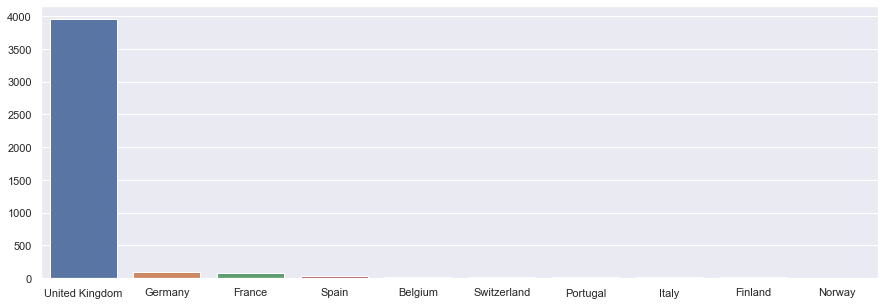

In [57]:
country=[]
for i in range(len(df3['Country'].value_counts().index)):
    country.append(df3['Country'].value_counts().index[i])
    country=country[:10]

size=[]
for i in range(len(df3['Country'].value_counts())):
    size.append(df3['Country'].value_counts()[i])
    size=size[:10]

plt.figure(figsize=(15,5))   
sns.barplot(country,size)

In [33]:
#User with most money spent
df3[df3['Total Money Spent']==max(df3['Total Money Spent'])]

,UserId,Country,ItemDescription,Total Transactions,Total Item Bought,Total Money Spent
1047,288687,United Kingdom,"[RETROSPOT LAMP, RETROSPOT LAMP]",2,48,81421701


In [34]:
df3.reset_index(inplace=True)
df3.drop('index',axis=1,inplace=True)

In [35]:
#Combing the item description country wise
#This will tell most bought products of each country
df3['ItemDescription']=df3['ItemDescription'].apply(lambda x:"_".join(x).replace('_'," "))

text_uk=[]
text_france=[]
text_germany=[]
text_other=[]

text_uk.append("".join(df3[df3['Country']=='United Kingdom']['ItemDescription']))
text_france.append("".join(df3[df3['Country']=='France']['ItemDescription']))
text_germany.append("".join(df3[df3['Country']=='Germany']['ItemDescription']))
text_other.append("".join(df3[~(df3['Country']=='United Kingdom')&~(df3['Country']=='France')&~(df3['Country']=='Germany')]['ItemDescription']))


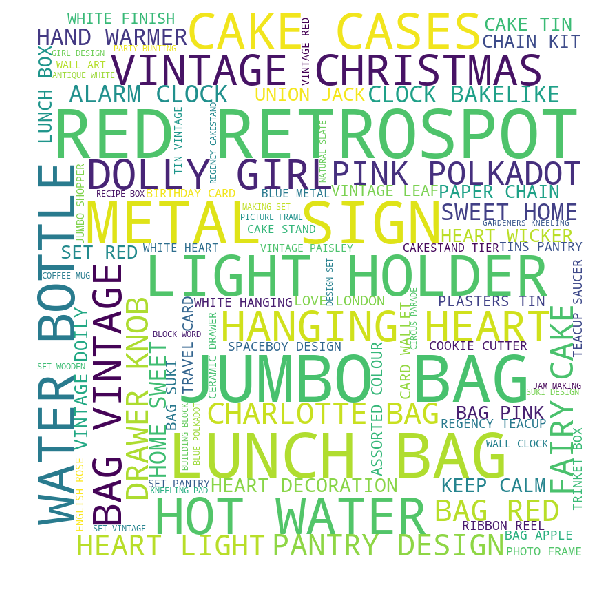

In [36]:
#Most bought products in United Kingdom
text_uk=text_uk[0]
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text_uk)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

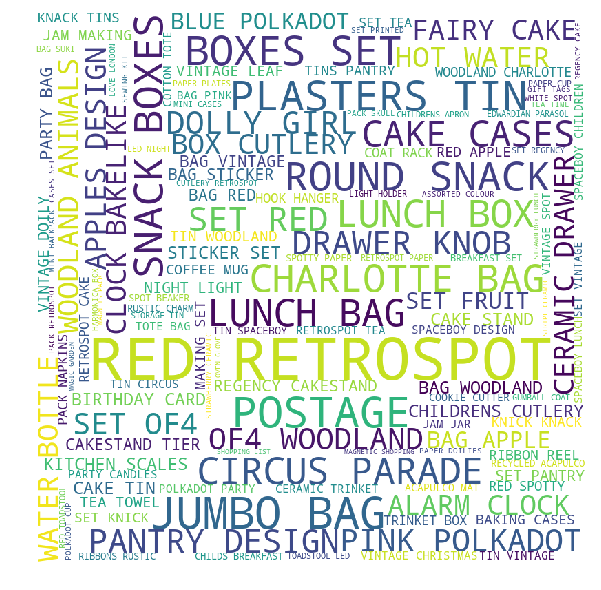

In [37]:
#Most bought products in Germany
text_germany=text_germany[0]
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text_germany)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

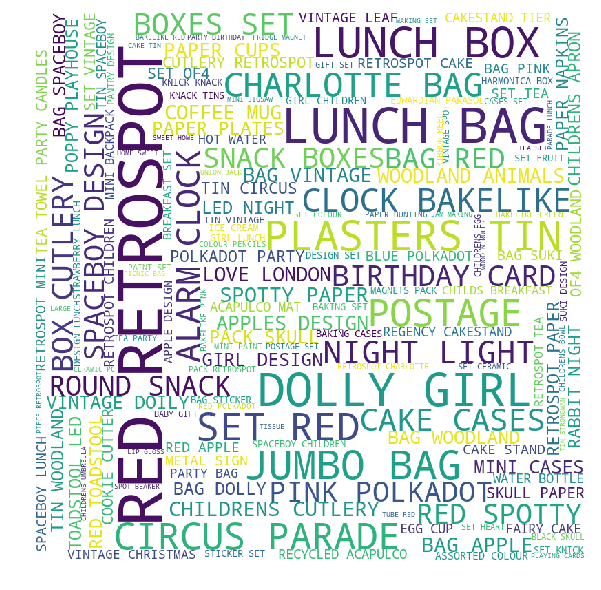

In [38]:
#Most bought products in France
text_france=text_france[0]
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text_france)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

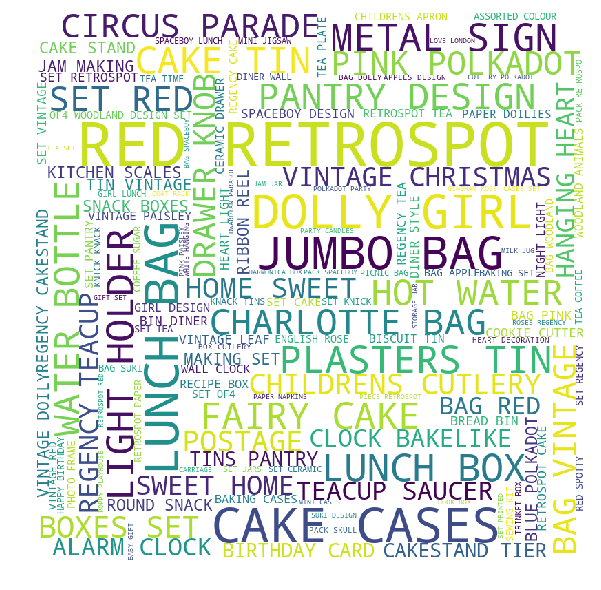

In [39]:
#Most bought products in remaining countries
text_other=text_other[0]
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text_other)
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

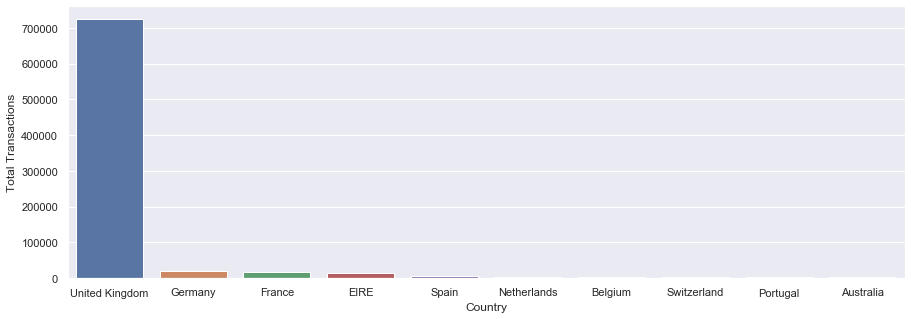

In [59]:
#Countries with most transactions
x=pd.DataFrame(df3.groupby(['Country'])['Total Transactions'].sum()).sort_values('Total Transactions',ascending=False)[:10]
plt.figure(figsize=(15,5))   
sns.barplot(x.index,x['Total Transactions'])

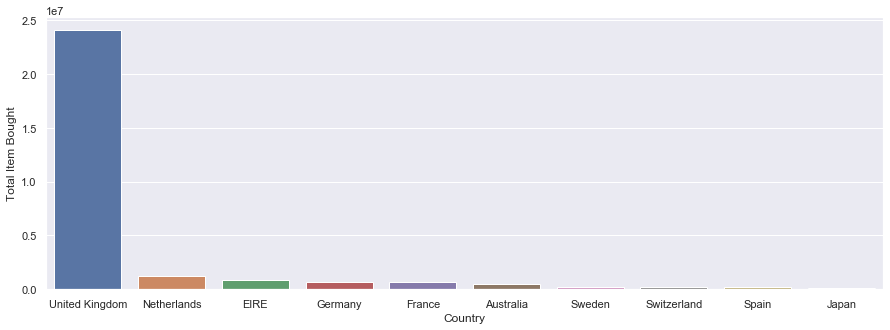

In [60]:
#Country with most sales
x=pd.DataFrame(df3.groupby(['Country'])['Total Item Bought'].sum()).sort_values('Total Item Bought',ascending=False)[:10]
plt.figure(figsize=(15,5))   
sns.barplot(x.index,x['Total Item Bought'])

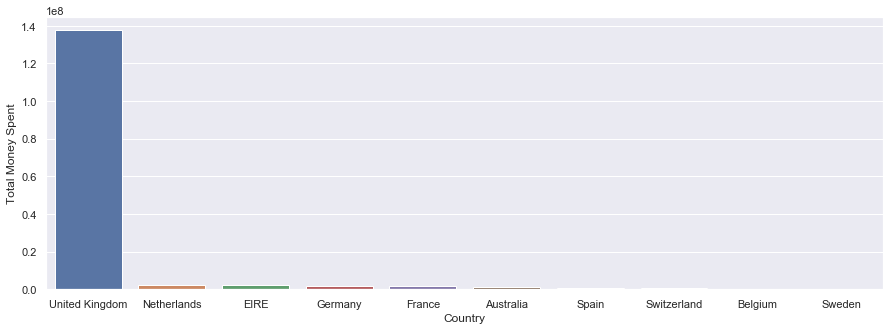

In [61]:
#Country with most money collected
x=pd.DataFrame(df3.groupby(['Country'])['Total Money Spent'].sum()).sort_values('Total Money Spent',ascending=False)[:10]
plt.figure(figsize=(15,5))   
sns.barplot(x.index,x['Total Money Spent'])

In [43]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Day,Month,Year,Date
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,Sat,Feb,2019,02
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,Wed,Dec,2018,26
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,Fri,Feb,2019,15
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,Fri,Jun,2018,22
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom,Mon,Sep,2018,10


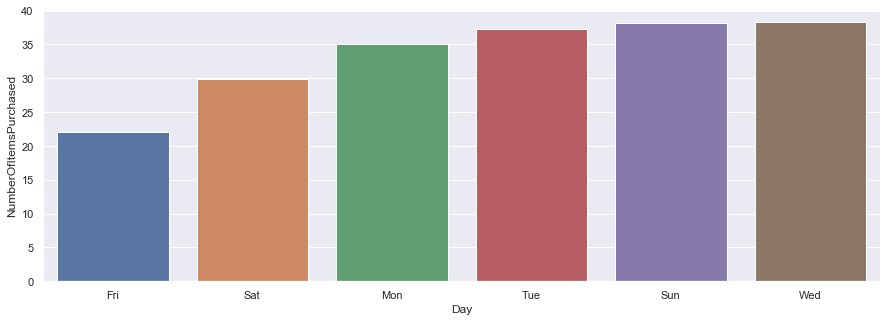

In [63]:
#Plot to tell which day records most sale
x=pd.DataFrame(df.groupby(['Day'])['NumberOfItemsPurchased'].mean()).sort_values('NumberOfItemsPurchased')
plt.figure(figsize=(15,5))   
sns.barplot(x.index,x['NumberOfItemsPurchased'])

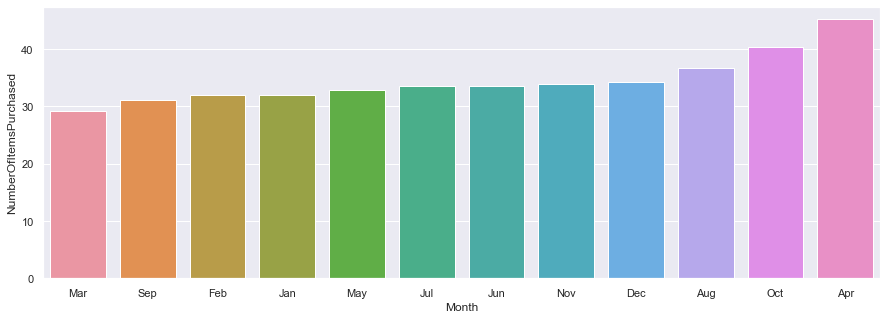

In [66]:
#Plot to tell which month records most sale
x=pd.DataFrame(df.groupby(['Month'])['NumberOfItemsPurchased'].mean()).sort_values('NumberOfItemsPurchased')
plt.figure(figsize=(15,5))   
sns.barplot(x.index,x['NumberOfItemsPurchased'])

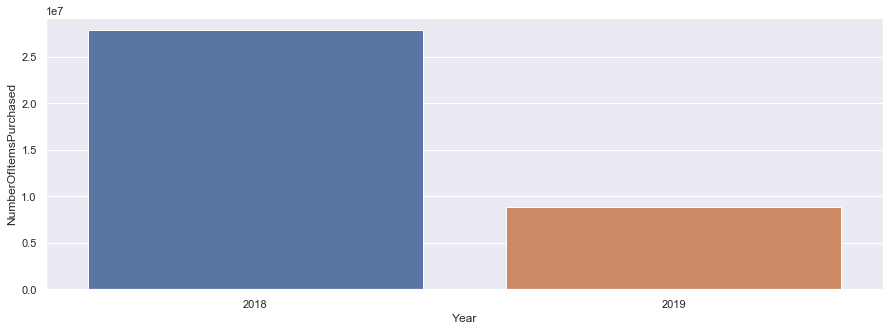

In [67]:
#Plot to tell which year records most sale
x=pd.DataFrame(df.groupby(['Year'])['NumberOfItemsPurchased'].sum()).sort_values('NumberOfItemsPurchased')
plt.figure(figsize=(15,5))   
sns.barplot(x.index,x['NumberOfItemsPurchased'])

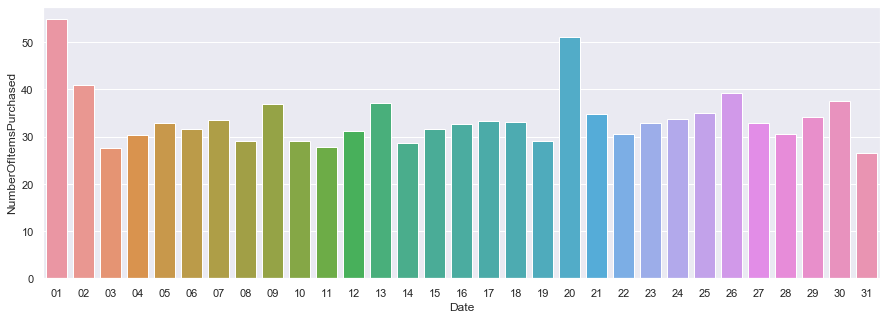

In [69]:
#Plot to tell which date records most sale
x=pd.DataFrame(df.groupby(['Date'])['NumberOfItemsPurchased'].mean())
plt.figure(figsize=(15,5))   
sns.barplot(x.index,x['NumberOfItemsPurchased'])

In [54]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,Day,Month,Year,Date
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,Sat,Feb,2019,02
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom,Wed,Dec,2018,26
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France,Fri,Feb,2019,15
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom,Fri,Jun,2018,22
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom,Mon,Sep,2018,10


In [55]:
x=df.groupby('ItemCode').sum().reset_index()[['ItemCode','NumberOfItemsPurchased']].sort_values('NumberOfItemsPurchased',ascending=False).reset_index().drop('index',axis=1)
x['NumberOfItemsPurchased']=abs(x['NumberOfItemsPurchased'])

In [56]:
x['ItemName']=x['ItemCode']
for i in range(len(y)):
    x['ItemName'][i]=df[df['ItemCode']==x['ItemCode'][i]]['ItemDescription'].iloc[0]

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
#Top 10 most purchased item
top_10=x.sort_values('NumberOfItemsPurchased',ascending=False)[:10]
top_10

,ItemCode,NumberOfItemsPurchased,ItemName
0,500703,971940,"PAPER CRAFT , LITTLE BIRDIE"
1,486486,915162,MEDIUM CERAMIC TOP STORAGE JAR
2,1787079,492744,JUMBO BAG BAROQUE BLACK WHITE
3,466137,343566,SMALL POPCORN HOLDER
4,1765617,337182,WORLD WAR 2 GLIDERS ASSTD DESIGNS
5,1787583,266472,WHITE HANGING HEART T-LIGHT HOLDER
6,445452,219228,PACK OF 72 RETROSPOT CAKE CASES
7,1782459,218580,ASSORTED COLOUR BIRD ORNAMENT
8,484764,196788,RABBIT NIGHT LIGHT
9,472332,160740,MINI PAINT SET VINTAGE


In [58]:
top_10['Money Earned']=top_10['ItemCode']
for i in range(len(top_10)):
    n=top_10['NumberOfItemsPurchased'][i]
    cost=df[df['ItemCode']==top_10['ItemCode'][i]]['CostPerItem'].iloc[0]
    total=n*cost
    top_10['Money Earned'][i]=total

C:\Users\bansa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
#Business with most sold products
top_10

,ItemCode,NumberOfItemsPurchased,ItemName,Money Earned
0,500703,971940,"PAPER CRAFT , LITTLE BIRDIE",2799187
1,486486,915162,MEDIUM CERAMIC TOP STORAGE JAR,3111550
2,1787079,492744,JUMBO BAG BAROQUE BLACK WHITE,2808640
3,466137,343566,SMALL POPCORN HOLDER,773023
4,1765617,337182,WORLD WAR 2 GLIDERS ASSTD DESIGNS,138244
5,1787583,266472,WHITE HANGING HEART T-LIGHT HOLDER,1087205
6,445452,219228,PACK OF 72 RETROSPOT CAKE CASES,166613
7,1782459,218580,ASSORTED COLOUR BIRD ORNAMENT,511477
8,484764,196788,RABBIT NIGHT LIGHT,566749
9,472332,160740,MINI PAINT SET VINTAGE,361665


# Segmentation

In [70]:
df3.head()

,UserId,Country,ItemDescription,Total Transactions,Total Item Bought,Total Money Spent
1,259266,United Kingdom,"[MEDIUM CERAMIC TOP STORAGE JAR, MEDIUM CERAMI...",4,0,0
2,259287,Iceland,"[SET OF 60 VINTAGE LEAF CAKE CASES , ALARM CLO...",364,14748,35759
3,259308,Finland,"[60 CAKE CASES VINTAGE CHRISTMAS, MULTI HEARTS...",62,14046,14963
4,259329,Italy,"[TEA TIME TEAPOT IN GIFT BOX, DOORMAT RED RETR...",146,3786,14571
5,259350,Norway,"[RED HARMONICA IN BOX , PLASTERS IN TIN VINTA...",34,1182,2774


In [71]:
df4=df3.drop('ItemDescription',axis=1)

In [72]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
df4['Country']=en.fit_transform(df4['Country'])

In [73]:
df4.head()

,UserId,Country,Total Transactions,Total Item Bought,Total Money Spent
1,259266,35,4,0,0
2,259287,16,364,14748,35759
3,259308,12,62,14046,14963
4,259329,18,146,3786,14571
5,259350,24,34,1182,2774


In [74]:
df4.describe()

,UserId,Country,Total Transactions,Total Item Bought,Total Money Spent
count,4372.000,4372.000,4372.000,4372.000,4372.000
mean,321293.232,33.199,186.107,6734.064,34376.025
std,36170.205,6.157,464.943,28036.744,1233051.588
min,259266.000,0.000,2.000,-1818.000,-35501.000
25%,290067.750,35.000,34.000,918.000,2437.750
50%,321310.500,35.000,84.000,2190.000,5378.500
75%,352343.250,35.000,204.000,5773.500,13376.750
max,384027.000,36.000,15966.000,1180314.000,81421701.000


In [75]:
df4[df4['Total Money Spent']==81421701.000]

,UserId,Country,Total Transactions,Total Item Bought,Total Money Spent
1047,288687,35,2,48,81421701


In [76]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

C:\Users\asus\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:144: FutureWarning:

The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.



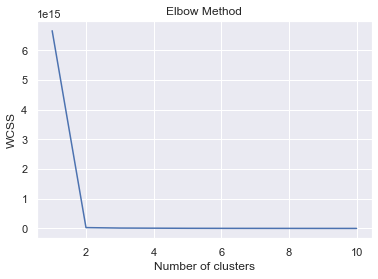

In [77]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df4)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [81]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df4)
labels = kmeans.labels_

In [82]:
df4['clusters'] = labels

In [83]:
df4['clusters'].value_counts()

0    2189
3    2175
2       7
1       1
Name: clusters, dtype: int64

Text(31.496603472222233, 0.5, 'Total Money Spent')

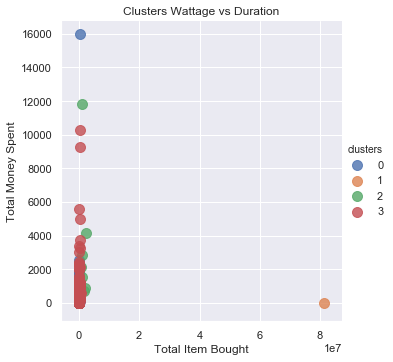

In [85]:
sns.lmplot('Total Money Spent', 'Total Transactions', 
           data=df4, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters Wattage vs Duration')
plt.xlabel('Total Item Bought')
plt.ylabel('Total Money Spent')

In [92]:
df_1=df4[df4['clusters']==1]
df_2=df4[df4['clusters']==2]
df_3=df4[df4['clusters']==3]
df_0=df4[df4['clusters']==0]

In [93]:
df_1.describe()

,UserId,Country,Total Transactions,Total Item Bought,Total Money Spent,clusters
count,1.000,1.000,1.000,1.000,1.000,1.000
mean,288687.000,35.000,2.000,48.000,81421701.000,1.000
std,nan,nan,nan,nan,nan,nan
min,288687.000,35.000,2.000,48.000,81421701.000,1.000
25%,288687.000,35.000,2.000,48.000,81421701.000,1.000
50%,288687.000,35.000,2.000,48.000,81421701.000,1.000
75%,288687.000,35.000,2.000,48.000,81421701.000,1.000
max,288687.000,35.000,2.000,48.000,81421701.000,1.000


In [94]:
df_2.describe()

,UserId,Country,Total Transactions,Total Item Bought,Total Money Spent,clusters
count,7.000,7.000,7.000,7.000,7.000,7.000
mean,327573.000,21.143,3441.714,517996.286,1399996.714,2.000
std,44505.314,14.577,3877.571,295436.059,617081.304,0.000
min,260715.000,0.000,702.000,342150.000,731721.000,2.000
25%,302421.000,10.000,1211.000,381402.000,983693.000,2.000
50%,313131.000,23.000,2152.000,414174.000,1100086.000,2.000
75%,367090.500,35.000,3505.000,463266.000,1840158.500,2.000
max,380142.000,35.000,11806.000,1180314.000,2320467.000,2.000


In [95]:
df_3.describe()

,UserId,Country,Total Transactions,Total Item Bought,Total Money Spent,clusters
count,2175.000,2175.000,2175.000,2175.000,2175.000,2175.000
mean,290015.050,31.527,191.144,7186.436,16554.732,3.000
std,18313.395,8.173,432.951,19887.762,40730.894,0.000
min,259266.000,0.000,2.000,-1464.000,-9876.000,3.000
25%,274123.500,35.000,36.000,987.000,2632.000,3.000
50%,289989.000,35.000,86.000,2490.000,6012.000,3.000
75%,305497.500,35.000,210.000,6777.000,15253.500,3.000
max,350364.000,36.000,10256.000,370818.000,546897.000,3.000


In [96]:
df_0.describe()

,UserId,Country,Total Transactions,Total Item Bought,Total Money Spent,clusters
count,2189.000,2189.000,2189.000,2189.000,2189.000,2189.000
mean,352366.185,34.898,170.775,4652.722,10536.208,0.000
std,18325.335,1.625,412.538,9857.442,20967.310,0.000
min,319914.000,0.000,2.000,-1818.000,-35501.000,0.000
25%,336651.000,35.000,32.000,864.000,2186.000,0.000
50%,352254.000,35.000,80.000,1968.000,4814.000,0.000
75%,368277.000,35.000,194.000,4968.000,11490.000,0.000
max,384027.000,36.000,15966.000,193944.000,437743.000,0.000


In [97]:
df4.to_csv('Assignment-1.csv')